<a href="https://colab.research.google.com/github/AnkaraUniFedaisi/ml2_first_project_clone/blob/main/ml2first_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd

In [12]:
housing_data = pd.read_csv("housing.csv")
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15210 entries, 0 to 15209
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15210 non-null  float64
 1   latitude            15210 non-null  float64
 2   housing_median_age  15210 non-null  float64
 3   total_rooms         15210 non-null  float64
 4   total_bedrooms      15062 non-null  float64
 5   population          15210 non-null  float64
 6   households          15210 non-null  float64
 7   median_income       15210 non-null  float64
 8   median_house_value  15210 non-null  float64
 9   ocean_proximity     15209 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.2+ MB


In [14]:
housing_data["ocean_proximity"].value_counts()

<1H OCEAN     7299
INLAND        4929
NEAR OCEAN    1489
NEAR BAY      1487
ISLAND           5
Name: ocean_proximity, dtype: int64

In [15]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,15210.000000,15210.000000,15210.000000,15210.000000,15062.000000,15210.000000,15210.000000,15210.000000,15210.000000
mean,-119.013605,35.157512,28.958909,2639.069954,543.708405,1443.109467,502.916568,3.803106,198435.696187
std,1.840608,2.049149,12.366761,2266.803851,437.779990,1142.507915,394.184695,1.888558,111404.650522
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,23.000000
25%,-120.380000,33.870000,19.000000,1430.000000,295.000000,791.000000,278.000000,2.510175,116700.000000
50%,-118.280000,34.080000,30.000000,2092.000000,433.000000,1167.000000,407.000000,3.454250,170700.000000
75%,-117.900000,36.950000,37.000000,3107.000000,648.000000,1742.000000,602.000000,4.660575,245775.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,28566.000000,6082.000000,15.000100,500001.000000


In [16]:
import matplotlib.pyplot as plt

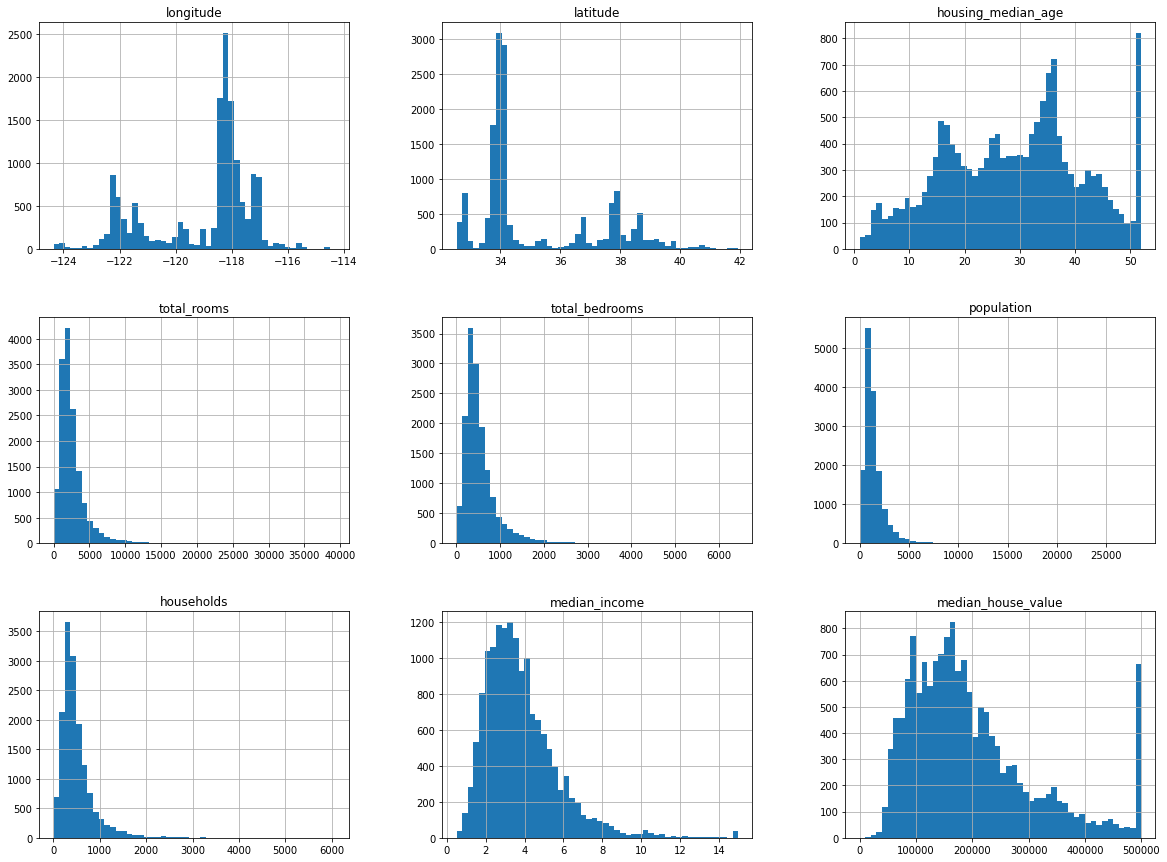

In [17]:
housing_data.hist(bins= 50, figsize= (20, 15))
plt.show()

In [18]:
import numpy as np

In [19]:
def split_train_test(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

In [20]:
train_set, test_set = split_train_test(housing_data, 0.2)

In [21]:
len(test_set)

3042

In [22]:
len(train_set)

12168

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
train_set, test_set = train_test_split(housing_data, test_size= 0.2, random_state= 42)

In [25]:
housing_data["income_cat"] = pd.cut(housing_data["median_income"],
                                    bins= [0, 1.5, 3.0, 4.5, 6.0, np.inf],
                                    labels= [1, 2, 3, 4, 5])

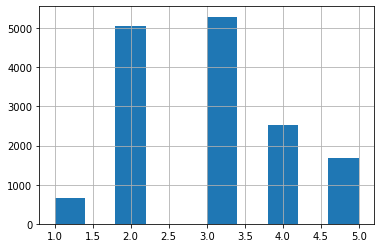

In [26]:
housing_data["income_cat"].hist()

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit

In [28]:
split = StratifiedShuffleSplit(n_splits= 1, test_size= 0.2, random_state= 42)
for train_index, test_index in split.split(housing_data, housing_data["income_cat"]):
  strat_train_set = housing_data.loc[train_index]
  strat_test_set = housing_data.loc[test_index]

In [29]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.348126
2    0.332676
4    0.165352
5    0.110782
1    0.043064
Name: income_cat, dtype: float64

In [30]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis= 1, inplace= True)

In [31]:
housing_data = strat_train_set.copy()

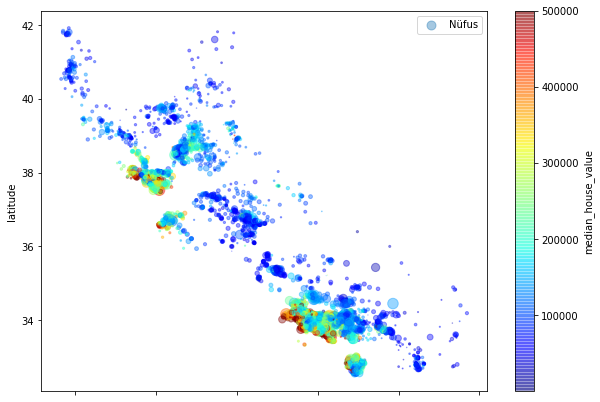

In [32]:
housing_data.plot(kind= "scatter", x= "longitude", y= "latitude", alpha= 0.4,
                  s= housing_data["population"] / 100, label= "Nüfus", figsize= 
                  (10, 7), c= "median_house_value", cmap= plt.get_cmap("jet"),
                  colorbar= True)
plt.legend()

In [33]:
corr_matrix = housing_data.corr()

In [34]:
corr_matrix["median_house_value"].sort_values(ascending= False)

median_house_value    1.000000
median_income         0.693275
total_rooms           0.141664
longitude             0.077457
households            0.071118
housing_median_age    0.070956
total_bedrooms        0.053649
population           -0.022083
latitude             -0.225503
Name: median_house_value, dtype: float64

In [35]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcde6854250>,
      dtype=object)

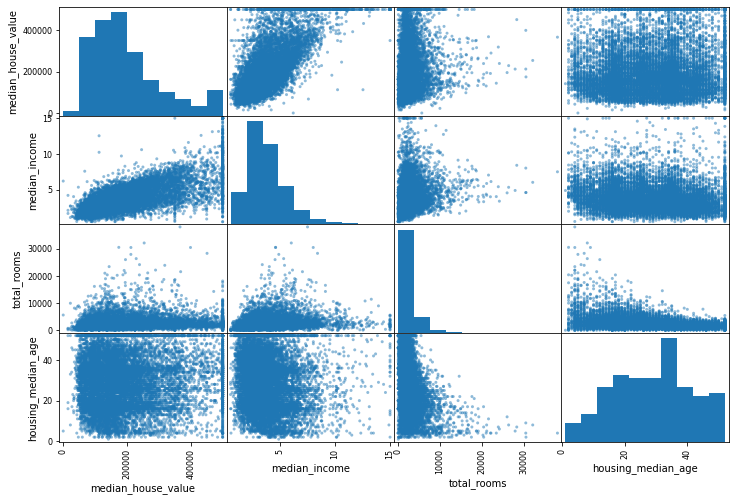

In [36]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing_data[attributes], figsize= (12, 8))

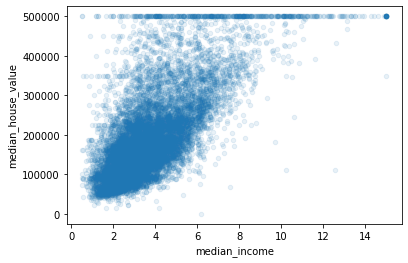

In [37]:
housing_data.plot(kind= "scatter", x= "median_income", y= "median_house_value",
                  alpha= 0.1)

In [38]:
housing_data["rooms_per_household"] = housing_data["total_rooms"] / housing_data["households"]
housing_data["bedrooms_per_room"] = housing_data["total_bedrooms"] / housing_data["total_rooms"]
housing_data["population_per_household"] = housing_data["population"] / housing_data["households"]

In [39]:
corr_matrix = housing_data.corr()
corr_matrix["median_house_value"].sort_values(ascending= False)

median_house_value          1.000000
median_income               0.693275
total_rooms                 0.141664
rooms_per_household         0.137345
longitude                   0.077457
households                  0.071118
housing_median_age          0.070956
total_bedrooms              0.053649
population                 -0.022083
population_per_household   -0.093771
latitude                   -0.225503
bedrooms_per_room          -0.263712
Name: median_house_value, dtype: float64

In [40]:
housing_data = strat_train_set.drop("median_house_value", axis= 1)
housing_labels = strat_train_set["median_house_value"].copy()

In [41]:
from sklearn.impute import SimpleImputer

In [42]:
imputer = SimpleImputer(strategy= "median")

In [43]:
housing_data_num = housing_data.drop("ocean_proximity", axis =1)
imputer.fit(housing_data_num)

SimpleImputer(strategy='median')

In [44]:
imputer.statistics_

array([-118.28  ,   34.08  ,   30.    , 2083.5   ,  431.    , 1164.    ,
        406.    ,    3.4485])

In [45]:
housing_data_num.median().values

array([-118.28  ,   34.08  ,   30.    , 2083.5   ,  431.    , 1164.    ,
        406.    ,    3.4485])

In [46]:
X = imputer.transform(housing_data_num)
housing_data_tr = pd.DataFrame(X, columns= housing_data_num.columns,
                               index= housing_data_num.index)

In [47]:
housing_data_cat = housing_data[["ocean_proximity"]]
housing_data_cat.head(10)

,ocean_proximity
5424,<1H OCEAN
3880,<1H OCEAN
9230,INLAND
2986,INLAND
3104,INLAND
76,NEAR BAY
157,NEAR BAY
967,INLAND
2979,INLAND
11786,INLAND


In [48]:
from sklearn.preprocessing import OrdinalEncoder

In [49]:
ordinal_encoder = OrdinalEncoder()
housing_data_cat_encoded = ordinal_encoder.fit_transform(housing_data_cat)
housing_data_cat_encoded[:10]

array([[0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [3.],
       [3.],
       [1.],
       [1.],
       [1.]])

In [50]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', nan],
       dtype=object)]

In [51]:
from sklearn.preprocessing import OneHotEncoder

In [52]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_data_cat)
housing_cat_1hot

<12168x6 sparse matrix of type '<class 'numpy.float64'>'
	with 12168 stored elements in Compressed Sparse Row format>

In [53]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]])

In [54]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', nan],
       dtype=object)]

In [55]:
from sklearn.base import BaseEstimator, TransformerMixin

In [56]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

In [57]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_bedrooms_per_room= True):
    self.add_bedrooms_per_room = add_bedrooms_per_room
  
  def fit(self, X, y= None):
    return self # there's nothing to do else
  
  def transform(self, X, y= None):
    rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
    population_per_household = X[:, population_ix] / X[:, households_ix]
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
      return np.c_[X, rooms_per_household, population_per_household,
                   bedrooms_per_room]
    else:
      return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room= False)
housing_extra_attribs = attr_adder.transform(housing_data.values)

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [59]:
num_pipeline = Pipeline([
                         ('imputer', SimpleImputer(strategy= 'median')),
                         ('attribs_adder', CombinedAttributesAdder()),
                         ('std_scaler', StandardScaler())
])
housing_num_tr = num_pipeline.fit_transform(housing_data_num)

In [60]:
from sklearn.compose import ColumnTransformer

In [62]:
num_attribs = list(housing_data_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
                                  ('num', num_pipeline, num_attribs),
                                  ('cat', OneHotEncoder(), cat_attribs)
])
housing_prepared = full_pipeline.fit_transform(housing_data)

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [70]:
some_data = housing_data.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [71]:
print("Predictions: ", lin_reg.predict(some_data_prepared))

Predictions:  [260700.36776914 265160.63983695 141764.31595621  96526.47475762
 124839.33942699]


In [72]:
print("Labels: ", list(some_labels))

Labels:  [340800.0, 223600.0, 95300.0, 53800.0, 63500.0]


In [73]:
from sklearn.metrics import mean_squared_error

In [74]:
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

66528.75078288249

In [75]:
from sklearn.tree import DecisionTreeRegressor

In [76]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [77]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [78]:
from sklearn.model_selection import cross_val_score

In [79]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring= "neg_mean_squared_error", cv= 10)
tree_rmse_scores = np.sqrt(-scores)

In [80]:
def display_scores(scores):
  print("Scores: ", scores)
  print("Mean: ", scores.mean())
  print("Standart Deviation: ", scores.std())

In [81]:
display_scores(tree_rmse_scores)

Scores:  [67481.98798835 64074.78080313 66373.79262645 67088.8195369
 63937.51388564 71458.15822814 70853.08622877 59276.20884572
 71286.04186885 66244.80689953]
Mean:  66807.51969114963
Standart Deviation:  3626.519660115627


In [82]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring= "neg_mean_squared_error", cv= 10)

In [83]:
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [ 64130.72694062  66726.22575234  68047.56604127  64898.45979071
  64432.23075375 130215.60746214  67609.09864835  64242.62103555
  70866.38176115  67032.87065334]
Mean:  72820.17888392194
Standart Deviation:  19237.482469676055


In [84]:
from sklearn.ensemble import RandomForestRegressor

In [85]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [86]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

17719.12108266899

In [89]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores:  [46067.11811144 47454.69410486 50940.24583799 47501.56721634
 45647.69512716 48730.73129754 48541.21260734 42569.07198593
 52809.04198039 46434.06359692]
Mean:  47669.5441865913
Standart Deviation:  2706.826546120678


In [90]:
display_scores(forest_rmse_scores)

Scores:  [46067.11811144 47454.69410486 50940.24583799 47501.56721634
 45647.69512716 48730.73129754 48541.21260734 42569.07198593
 52809.04198039 46434.06359692]
Mean:  47669.5441865913
Standart Deviation:  2706.826546120678


In [91]:
  import joblib

In [94]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(housing_data, housing_labels)
full_pipeline_with_predictor.predict(some_data)

array([260700.36776914, 265160.63983695, 141764.31595621,  96526.47475762,
       124839.33942699])

In [95]:
my_model = full_pipeline_with_predictor

In [96]:
joblib.dump(my_model, 'my_model.pkl')
my_model_loaded = joblib.load("my_model.pkl")

In [97]:
from sklearn.model_selection import GridSearchCV

In [98]:
param_grid = [
              {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv= 5,
                           scoring= 'neg_mean_squared_error',
                           return_train_score= True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [99]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [100]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [103]:
RandomForestRegressor(bootstrap= True, criterion= 'mse', max_depth= None,
                      max_features= 8, max_leaf_nodes= None, min_impurity_decrease= 0.0,
                      min_samples_leaf= 1,
                      min_samples_split= 2, min_weight_fraction_leaf= 0.0,
                      n_estimators= 30, n_jobs= None, oob_score= False,
                      random_state= None, verbose= 0, warm_start= False)

RandomForestRegressor(criterion='mse', max_features=8, n_estimators=30)

In [104]:
cvres = grid_search.cv_results_

In [105]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

62058.63818158285 {'max_features': 2, 'n_estimators': 3}
53643.155251305085 {'max_features': 2, 'n_estimators': 10}
51114.700275954136 {'max_features': 2, 'n_estimators': 30}
57525.75250460565 {'max_features': 4, 'n_estimators': 3}
50080.85377162275 {'max_features': 4, 'n_estimators': 10}
48050.92812487779 {'max_features': 4, 'n_estimators': 30}
57312.30698697978 {'max_features': 6, 'n_estimators': 3}
49875.45844341994 {'max_features': 6, 'n_estimators': 10}
47661.50479330523 {'max_features': 6, 'n_estimators': 30}
56183.31452170543 {'max_features': 8, 'n_estimators': 3}
50030.972398192105 {'max_features': 8, 'n_estimators': 10}
47549.19040250177 {'max_features': 8, 'n_estimators': 30}
60457.637885973156 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
52552.889643571725 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
57862.086260060154 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
50179.108632479605 {'bootstrap': False, 'max_features': 3, 'n_estimato

In [108]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [109]:
extra_attribs = ["rooms_per_hholds", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse= True)

[(0.3584875337337784, 'median_income'),
 (0.1194397105735224, 'pop_per_hhold'),
 (0.11883957705119823, 'INLAND'),
 (0.07497664076743278, 'longitude'),
 (0.07472869968394101, 'bedrooms_per_room'),
 (0.06251031909669888, 'rooms_per_hholds'),
 (0.06012660399686232, 'latitude'),
 (0.04112147513985343, 'housing_median_age'),
 (0.023392948647540237, '<1H OCEAN'),
 (0.015667788268969845, 'total_bedrooms'),
 (0.015610254025033616, 'total_rooms'),
 (0.014637665564710654, 'population'),
 (0.01419452155917069, 'households'),
 (0.003582988401265733, 'NEAR OCEAN'),
 (0.0022024578890026676, 'NEAR BAY'),
 (0.0002918756538075485, nan),
 (0.00018893994721168756, 'ISLAND')]

In [111]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis= 1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [112]:
from scipy import stats

In [113]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc= squared_errors.mean(),
                         scale= stats.sem(squared_errors)))

array([42721.2557725 , 47146.56650153])